In [1]:
import sys
if ".." not in sys.path:
    sys.path.insert(0, "..")
    
from src.utils import *
from src.plots import *
import torch.optim as optim

In [2]:
DEVICE = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP(input_dim = 1536, hidden_dims = [512], output_dim = 6, dropout = 0.2).to(DEVICE)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr = 0.001)
num_epochs = 50
PARAMS = {'model': model,
          'criterion': criterion,
          'optimizer': optimizer,
          'num_epochs': num_epochs,
          'device': DEVICE,
          'patience': 10}

/home/mweuro/venvy/best_venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
embs_wav2vec = torch.load('../embeddings/audio/raw_wav2vec2.pt')
embs_hubert = torch.load('../embeddings/audio/raw_hubert.pt')
embs_wavlm = torch.load('../embeddings/audio/raw_wavlm.pt')
embs_video = torch.load('../embeddings/video/raw.pt')

Epoch 5/50
Train Loss: 0.9535,                    Train Accuracy: 0.6349,                    Train Precision: 0.6324,                    Train Recall 0.6349.
Val Loss: 0.9468,                    Val Accuracy: 0.6561,                    Val Precision: 0.6905,                    Val Recall: 0.6561.
--------------------------------------------------


Epoch 10/50
Train Loss: 0.7749,                    Train Accuracy: 0.7078,                    Train Precision: 0.7078,                    Train Recall 0.7078.
Val Loss: 0.7938,                    Val Accuracy: 0.6864,                    Val Precision: 0.7186,                    Val Recall: 0.6864.
--------------------------------------------------


Epoch 15/50
Train Loss: 0.6943,                    Train Accuracy: 0.7357,                    Train Precision: 0.7362,                    Train Recall 0.7357.
Val Loss: 0.7085,                    Val Accuracy: 0.7361,                    Val Precision: 0.7494,                    Val Recall: 0.7361.
--------------------------------------------------


Epoch 20/50
Train Loss: 0.6295,                    Train Accuracy: 0.7619,                    Train Precision: 0.7626,                    Train Recall 0.7619.
Val Loss: 0.7109,                    Val Accuracy: 0.7475,                    Val Precision: 0.7576,                    Val Recall: 0.7475.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.6184,                    Train Accuracy: 0.7658,                    Train Precision: 0.7661,                    Train Recall 0.7658.
Val Loss: 0.6897,                    Val Accuracy: 0.7408,                    Val Precision: 0.7873,                    Val Recall: 0.7408.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.5902,                    Train Accuracy: 0.7735,                    Train Precision: 0.7741,                    Train Recall 0.7735.
Val Loss: 0.6097,                    Val Accuracy: 0.7770,                    Val Precision: 0.7953,                    Val Recall: 0.7770.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.5802,                    Train Accuracy: 0.7762,                    Train Precision: 0.7772,                    Train Recall 0.7762.
Val Loss: 0.6159,                    Val Accuracy: 0.7804,                    Val Precision: 0.7995,                    Val Recall: 0.7804.
--------------------------------------------------


Epoch 40/50
Train Loss: 0.5580,                    Train Accuracy: 0.7849,                    Train Precision: 0.7864,                    Train Recall 0.7849.
Val Loss: 0.6878,                    Val Accuracy: 0.7408,                    Val Precision: 0.7813,                    Val Recall: 0.7408.
--------------------------------------------------


Epoch 45/50
Train Loss: 0.5518,                    Train Accuracy: 0.7895,                    Train Precision: 0.7922,                    Train Recall 0.7895.
Val Loss: 0.6138,                    Val Accuracy: 0.7905,                    Val Precision: 0.7989,                    Val Recall: 0.7905.
--------------------------------------------------


Epoch 50/50
Train Loss: 0.5426,                    Train Accuracy: 0.7843,                    Train Precision: 0.7861,                    Train Recall 0.7843.
Val Loss: 0.5838,                    Val Accuracy: 0.8026,                    Val Precision: 0.8131,                    Val Recall: 0.8026.
--------------------------------------------------
BEST EPOCH: 49.00          BEST ACCURACY: 0.80          BEST PRECISION: 0.81          BEST RECALL: 0.80


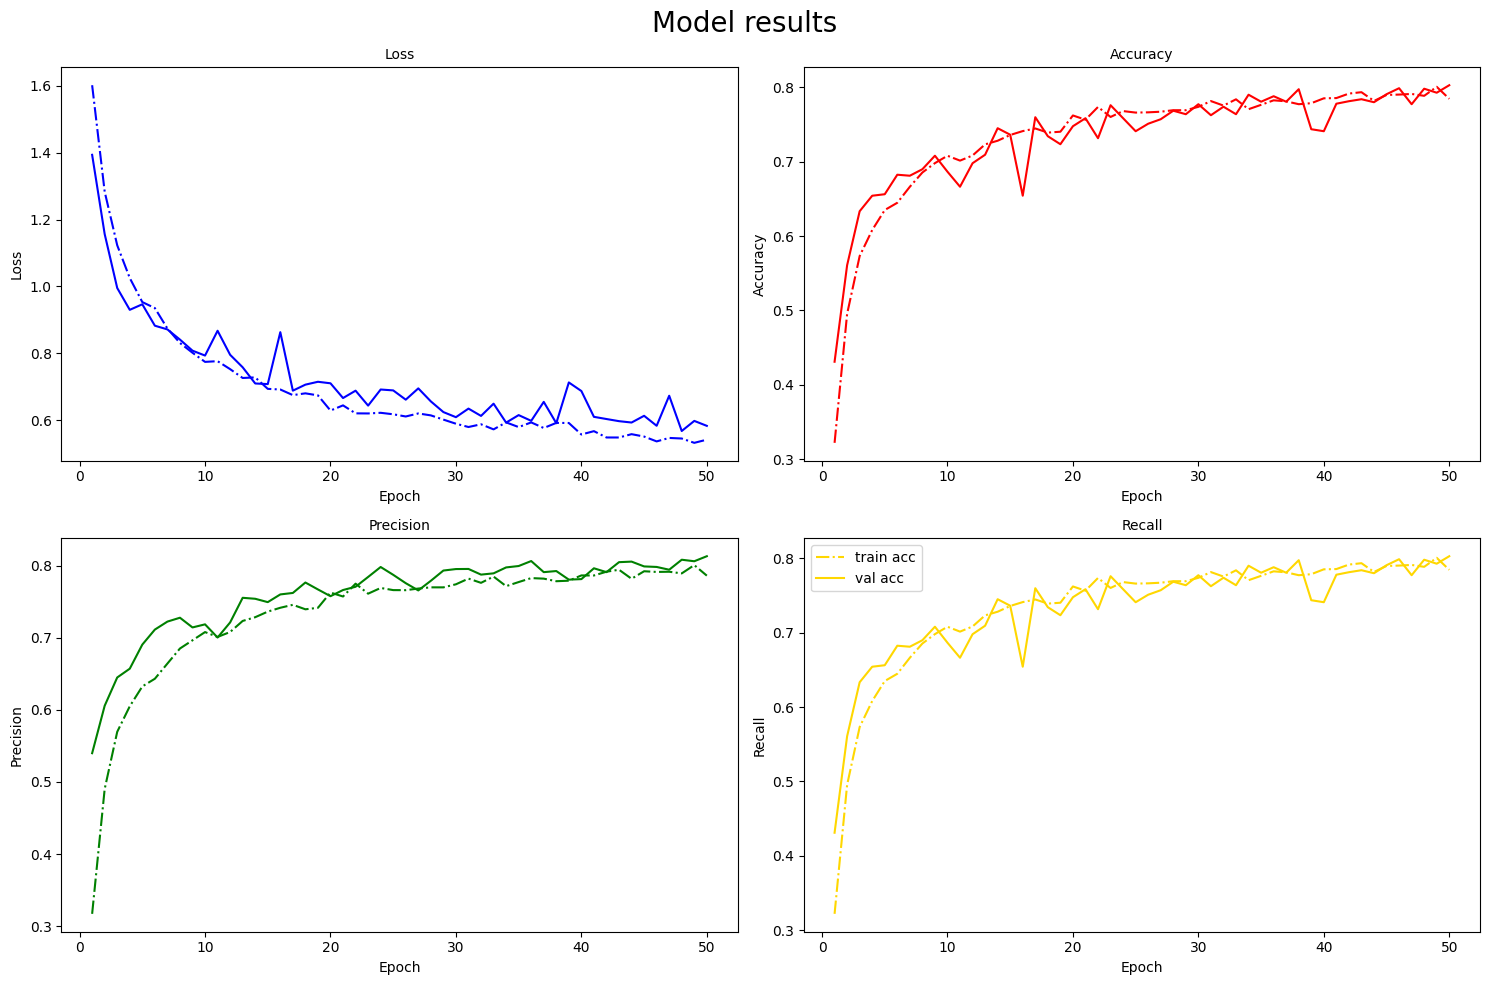

Epoch 5/50
Train Loss: 0.9625,                    Train Accuracy: 0.6312,                    Train Precision: 0.6342,                    Train Recall 0.6312.
Val Loss: 0.8576,                    Val Accuracy: 0.6931,                    Val Precision: 0.7321,                    Val Recall: 0.6931.
--------------------------------------------------


Epoch 10/50
Train Loss: 0.8300,                    Train Accuracy: 0.6878,                    Train Precision: 0.6898,                    Train Recall 0.6878.
Val Loss: 0.6814,                    Val Accuracy: 0.7770,                    Val Precision: 0.7851,                    Val Recall: 0.7770.
--------------------------------------------------


Epoch 15/50
Train Loss: 0.7683,                    Train Accuracy: 0.7154,                    Train Precision: 0.7179,                    Train Recall 0.7154.
Val Loss: 0.5960,                    Val Accuracy: 0.7945,                    Val Precision: 0.8113,                    Val Recall: 0.7945.
--------------------------------------------------


Epoch 20/50
Train Loss: 0.7261,                    Train Accuracy: 0.7334,                    Train Precision: 0.7373,                    Train Recall 0.7334.
Val Loss: 0.7333,                    Val Accuracy: 0.7139,                    Val Precision: 0.7575,                    Val Recall: 0.7139.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.7090,                    Train Accuracy: 0.7394,                    Train Precision: 0.7434,                    Train Recall 0.7394.
Val Loss: 0.5795,                    Val Accuracy: 0.8032,                    Val Precision: 0.8195,                    Val Recall: 0.8032.
--------------------------------------------------


BEST EPOCH: 15.00          BEST ACCURACY: 0.82          BEST PRECISION: 0.82          BEST RECALL: 0.82


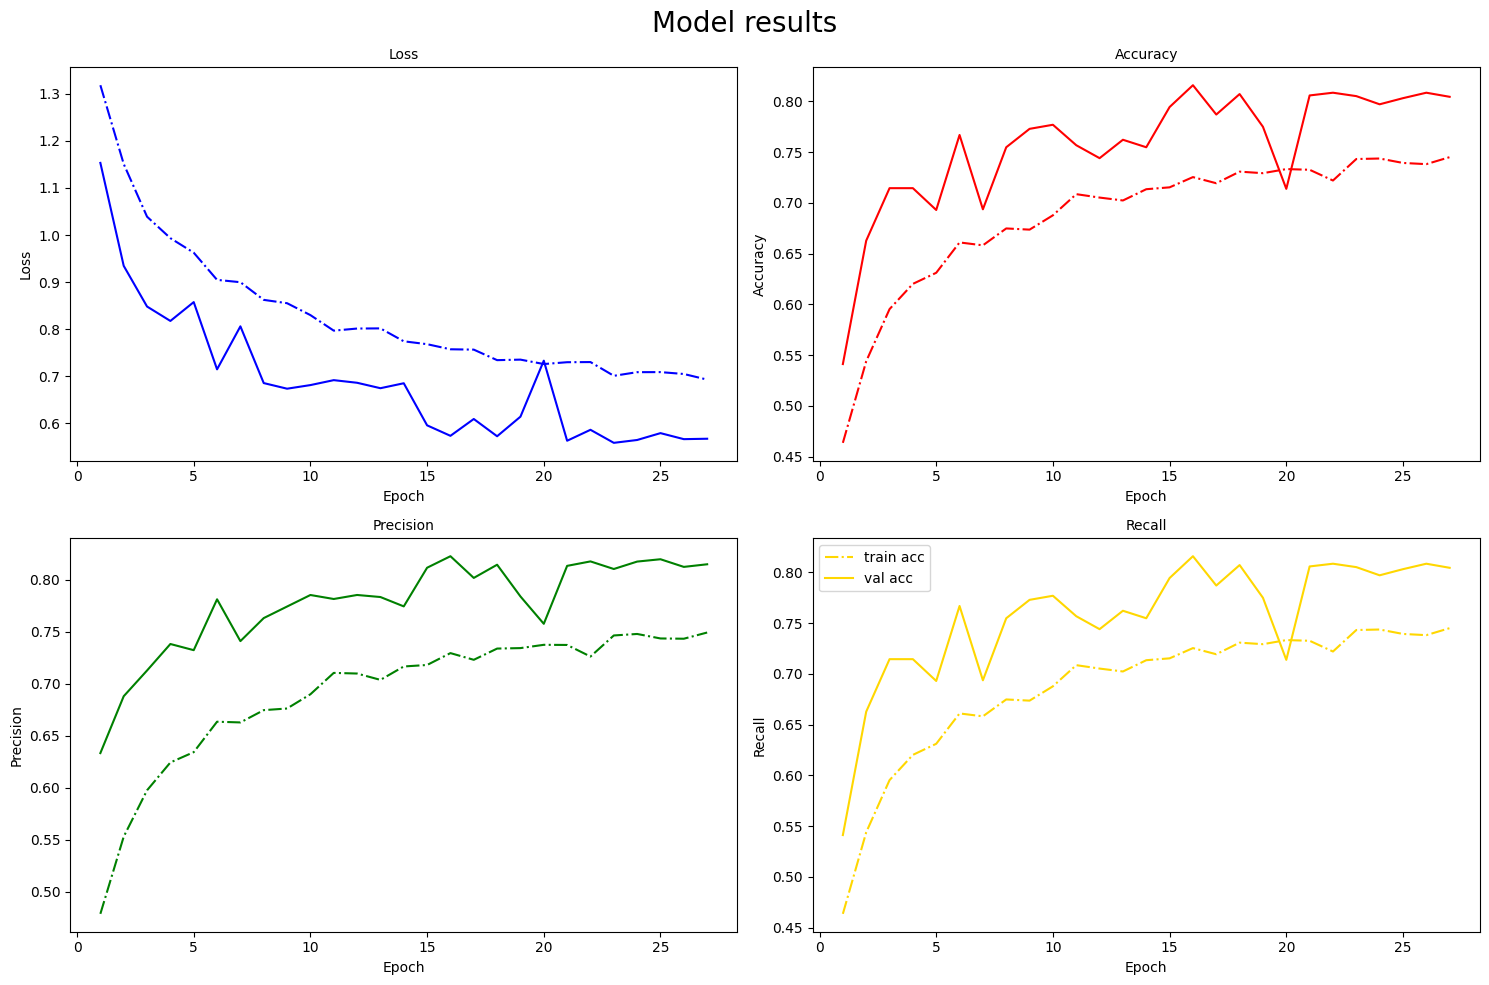

Epoch 5/50
Train Loss: 0.7143,                    Train Accuracy: 0.7300,                    Train Precision: 0.7347,                    Train Recall 0.7300.
Val Loss: 0.6083,                    Val Accuracy: 0.7945,                    Val Precision: 0.8042,                    Val Recall: 0.7945.
--------------------------------------------------


Epoch 10/50
Train Loss: 0.5808,                    Train Accuracy: 0.7868,                    Train Precision: 0.7880,                    Train Recall 0.7868.
Val Loss: 0.5026,                    Val Accuracy: 0.8214,                    Val Precision: 0.8435,                    Val Recall: 0.8214.
--------------------------------------------------


Epoch 15/50
Train Loss: 0.5366,                    Train Accuracy: 0.8041,                    Train Precision: 0.8050,                    Train Recall 0.8041.
Val Loss: 0.4532,                    Val Accuracy: 0.8388,                    Val Precision: 0.8507,                    Val Recall: 0.8388.
--------------------------------------------------


Epoch 20/50
Train Loss: 0.5054,                    Train Accuracy: 0.8113,                    Train Precision: 0.8124,                    Train Recall 0.8113.
Val Loss: 0.4030,                    Val Accuracy: 0.8522,                    Val Precision: 0.8553,                    Val Recall: 0.8522.
--------------------------------------------------


Epoch 25/50
Train Loss: 0.4776,                    Train Accuracy: 0.8305,                    Train Precision: 0.8317,                    Train Recall 0.8305.
Val Loss: 0.4491,                    Val Accuracy: 0.8496,                    Val Precision: 0.8629,                    Val Recall: 0.8496.
--------------------------------------------------


Epoch 30/50
Train Loss: 0.4468,                    Train Accuracy: 0.8369,                    Train Precision: 0.8379,                    Train Recall 0.8369.
Val Loss: 0.3837,                    Val Accuracy: 0.8563,                    Val Precision: 0.8567,                    Val Recall: 0.8563.
--------------------------------------------------


Epoch 35/50
Train Loss: 0.4316,                    Train Accuracy: 0.8449,                    Train Precision: 0.8455,                    Train Recall 0.8449.
Val Loss: 0.4049,                    Val Accuracy: 0.8576,                    Val Precision: 0.8598,                    Val Recall: 0.8576.
--------------------------------------------------
BEST EPOCH: 23.00          BEST ACCURACY: 0.86          BEST PRECISION: 0.86          BEST RECALL: 0.86


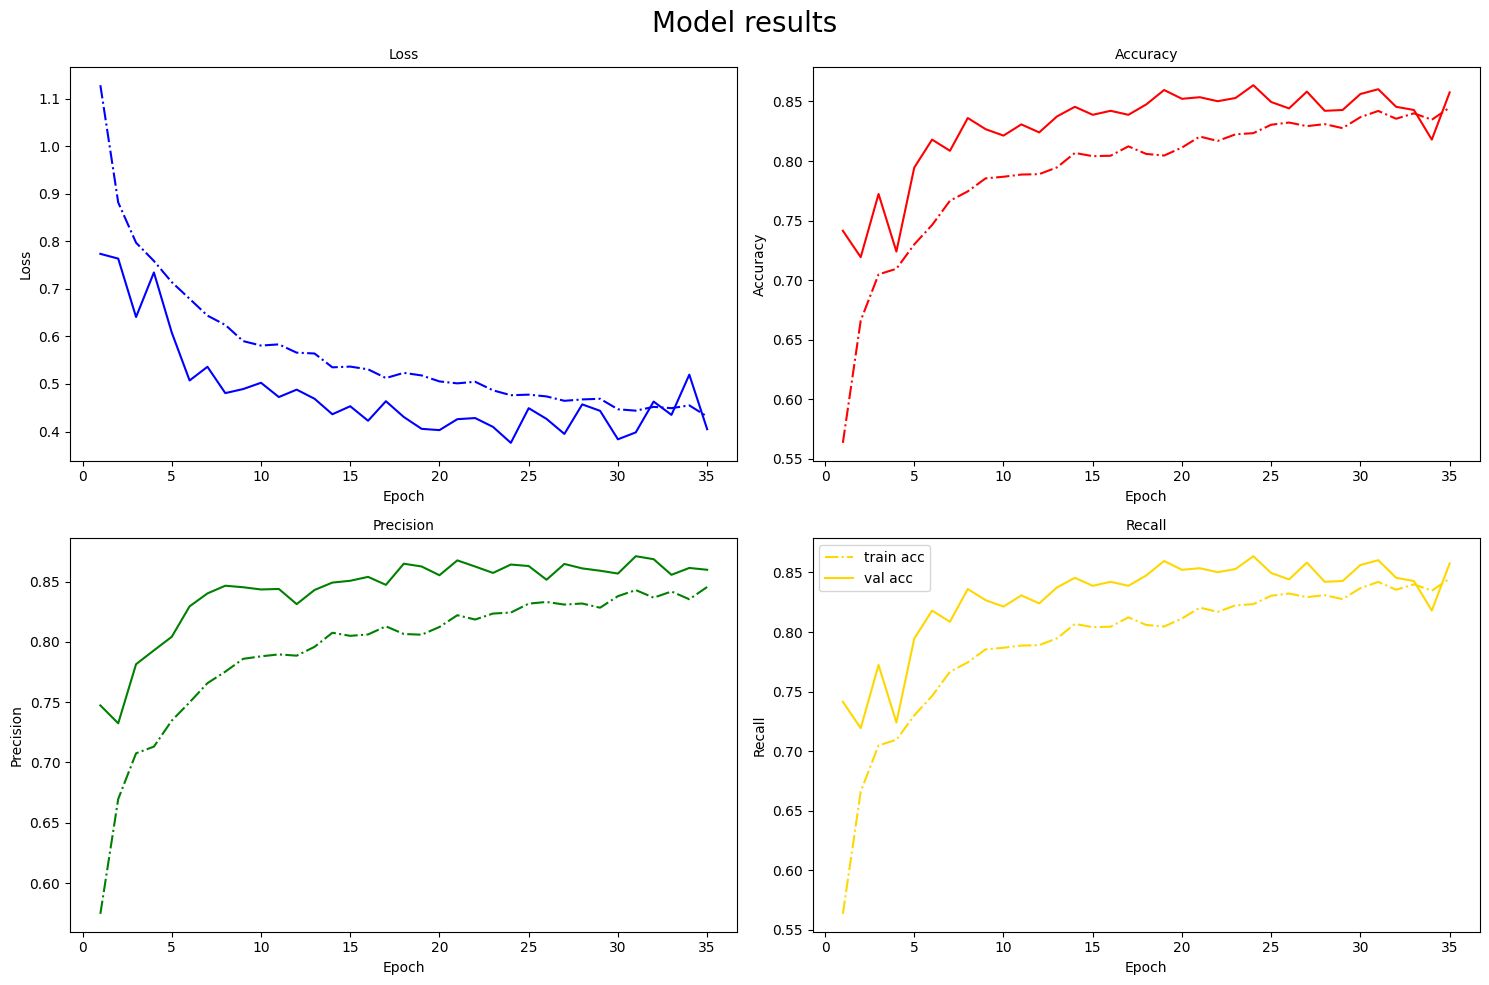

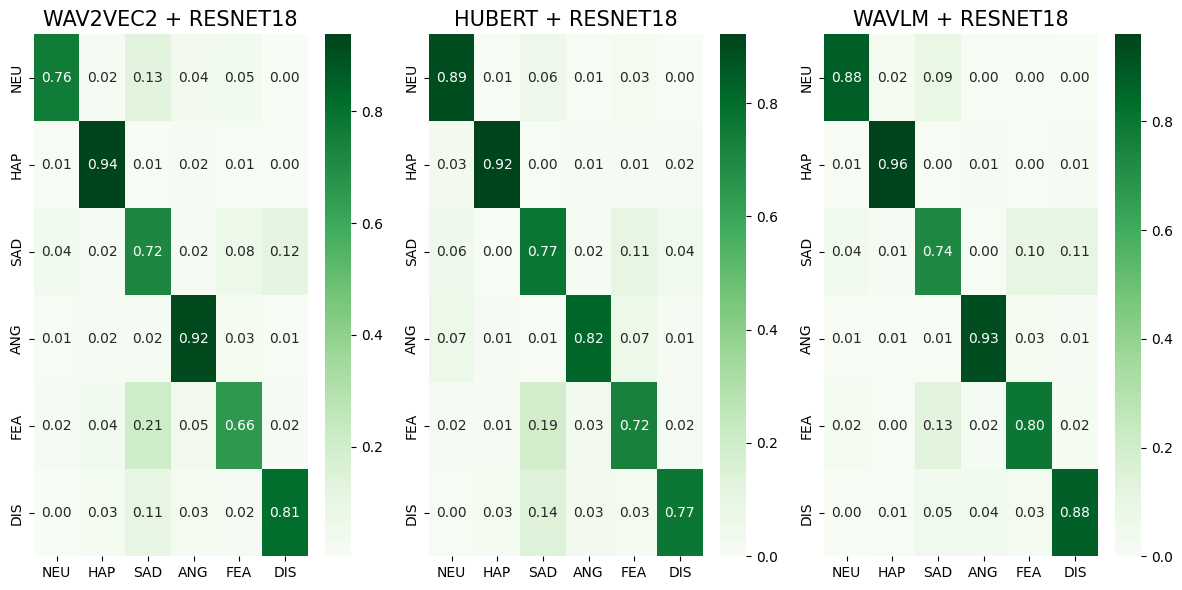

In [4]:
best_losses = []
best_accs = []
best_precs = []
best_recs = []
cms = []
embs_dict = {'WAV2VEC2 + RESNET18': embs_wav2vec, 'HUBERT + RESNET18': embs_hubert, 'WAVLM + RESNET18': embs_wavlm}

for embs in embs_dict.values():
    fused_embs = concat_embs(embs, embs_video)
    train_loader, test_loader = train_test_dataloader(fused_embs)
    params_copy = PARAMS.copy()
    params_copy['train_loader'] = train_loader
    params_copy['test_loader'] = test_loader
    epochs, train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs, best_epoch, cm = train_model(**params_copy)
    best_losses.append(val_losses[best_epoch])
    best_accs.append(val_accs[best_epoch])
    best_precs.append(val_precs[best_epoch])
    best_recs.append(val_recs[best_epoch])
    cms.append(cm)
    plot_metrics(train_losses, val_losses, train_accs, val_accs, train_precs, val_precs, train_recs, val_recs)

plot_multiple_confusion_matrices(**dict(zip(list(embs_dict.keys()), cms)))

df = pd.DataFrame({'Model': embs_dict.keys(), 'Loss': best_losses, 'Accuracy': best_accs, 'Precision': best_precs, 'Recall': best_recs})

In [5]:
df

,Model,Loss,Accuracy,Precision,Recall
0,WAV2VEC2 + RESNET18,0.583809,0.802552,0.813073,0.802552
1,HUBERT + RESNET18,0.573751,0.815984,0.822390,0.815984
2,WAVLM + RESNET18,0.376223,0.863667,0.864172,0.863667
